In [1]:
from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,GaussianNoise
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image
import cv2
import seaborn as sns; sns.set()
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
x_train  = x_train/255
x_test  = x_test/255

In [5]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [6]:
one_hot_encoder.fit(y_train)

OneHotEncoder(sparse=False)

In [7]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [8]:
num_classes = 10

In [9]:
# we will do some mild image pre-processing for augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    zca_epsilon=1e-06,fill_mode='nearest',)  # randomly flip images

In [10]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:],name='conv1'))
model.add(BatchNormalization(axis=3, name='bn_conv1'))
model.add(Activation('elu'))
model.add(Conv2D(64, (3, 3), padding='same',name='conv2'))
model.add(BatchNormalization(axis=3, name='bn_conv2'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',name='conv3'))
model.add(BatchNormalization(axis=3, name='bn_conv3'))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3), padding='same',name='conv4'))
model.add(BatchNormalization(axis=3, name='bn_conv4'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


model.add(Conv2D(256, (3, 3), padding='same',name='conv5'))
model.add(BatchNormalization(axis=3, name='bn_conv5'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3), padding='same',name='conv6'))
model.add(BatchNormalization(axis=3, name='bn_conv6'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3), padding='same',name='conv7'))
model.add(BatchNormalization(axis=3, name='bn_conv7'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',name='conv8'))
model.add(BatchNormalization(axis=3, name='bn_conv8'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv9'))
model.add(BatchNormalization(axis=3, name='bn_conv9'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv10'))
model.add(BatchNormalization(axis=3, name='bn_conv10'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',name='conv11'))
model.add(BatchNormalization(axis=3, name='bn_conv11'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv12'))
model.add(BatchNormalization(axis=3, name='bn_conv12'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv13'))
model.add(BatchNormalization(axis=3, name='bn_conv13'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


model.add(Flatten())
model.add(Dense(512,name='fc1'))
model.add(GaussianNoise(0.1))
model.add(Activation('elu'))
model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 32, 32, 64)       256       
 n)                                                              
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 64)        36928     
                                                                 
 bn_conv2 (BatchNormalizatio  (None, 32, 32, 64)       256       
 n)                                                              
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0

In [11]:
batch_size = 32
epochs = 120
model_history = model.fit(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/120
1562/1562 [==============================] - 54s 28ms/step - loss: 1.4812 - accuracy: 0.4628 - val_loss: 1.1555 - val_accuracy: 0.5993
Epoch 2/120
1562/1562 [==============================] - 43s 28ms/step - loss: 1.0910 - accuracy: 0.6161 - val_loss: 1.3692 - val_accuracy: 0.6106
Epoch 3/120
1562/1562 [==============================] - 44s 28ms/step - loss: 0.9241 - accuracy: 0.6831 - val_loss: 0.9521 - val_accuracy: 0.6927
Epoch 4/120
1562/1562 [==============================] - 45s 29ms/step - loss: 0.8078 - accuracy: 0.7225 - val_loss: 0.9554 - val_accuracy: 0.7013
Epoch 5/120
1562/1562 [==============================] - 43s 27ms/step - loss: 0.7262 - accuracy: 0.7520 - val_loss: 0.6703 - val_accuracy: 0.7754
Epoch 6/120
1562/1562 [==============================] - 43s 28ms/step - loss: 0.6699 - accuracy: 0.7709 - val_loss: 0.7069 - val_accuracy: 0.7631
Epoch 7/120
1562/1562 [==============================] - 44s 28ms/step - loss: 0.6180 - accuracy: 0.7897 - val_loss: 0

In [12]:
model.save('VGG16-2.h5')

In [13]:
from keras import models
model = models.load_model('VGG16-2.h5')

In [14]:
loss, accuracy = model.evaluate(x_train,y_train)
print("Trainging Accuracy = %.2f  %%   loss = %f" % (accuracy * 100, loss))
loss, accuracy = model.evaluate(x_test,y_test)
print("Testing Accuracy = %.2f %%   loss = %f " % (accuracy* 100 , loss))

1563/1563 [==============================] - 14s 9ms/step - loss: 0.0164 - accuracy: 0.9943
Trainging Accuracy = 99.43  %   loss = 0.016409
313/313 [==============================] - 3s 9ms/step - loss: 0.3638 - accuracy: 0.9169
Testing Accuracy = 91.69 %   loss = 0.363817 


In [15]:
predictions = model.predict(x_test)
predictions = one_hot_encoder.inverse_transform(predictions)
y_test = one_hot_encoder.inverse_transform(y_test)

In [16]:
cm = confusion_matrix(y_test, predictions)

In [17]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

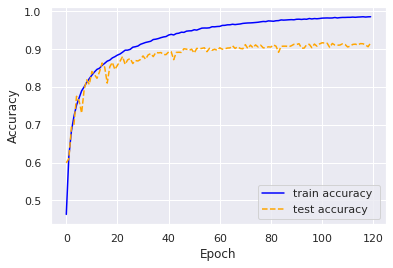

In [18]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(model_history.history['accuracy'],
         label='train accuracy ',
         c='blue', ls='-')
plt.plot(model_history.history['val_accuracy'],
         label='test accuracy ',
         c='orange',ls='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

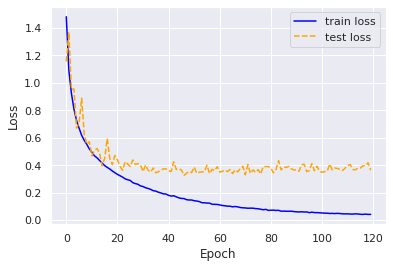

In [19]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(model_history.history['loss'],
         label='train loss',
         c='blue', ls='-')
plt.plot(model_history.history['val_loss'],
         label='test loss',
         c='orange',ls='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

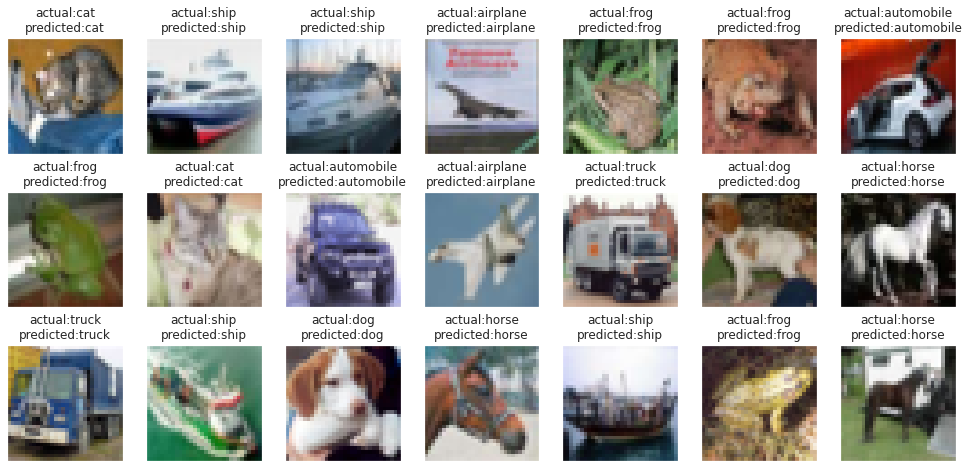

In [20]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + classes[y_test[index][0]] + '\n' 
                            + 'predicted:' + classes[predictions[index][0]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

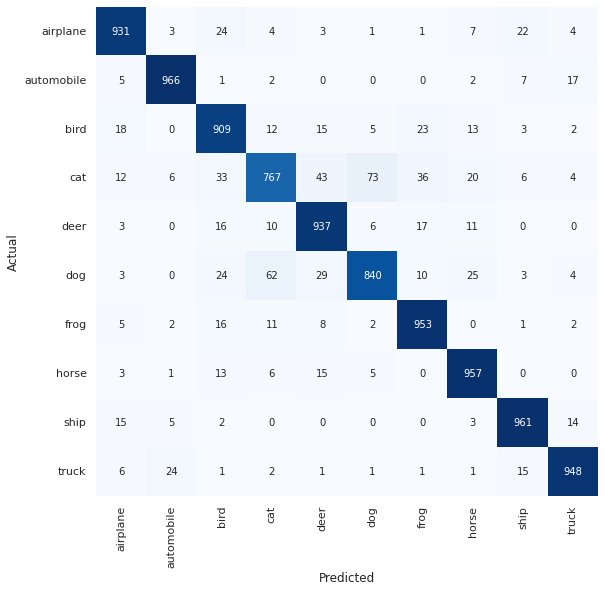

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes,fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()